<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=cyan>
Artifical Intelligence - Dr. SamiEe
</font>
<br/>
<br/>

<hr/>
<font color=cyan>
Reinforcment Learning Practical Assignment
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this notebook you will use the [openai gym](https://www.gymlibrary.dev/) library to train agent in reinforcment learning environment. Our environment is a discrete-state env (and it is deterministic).
make sure to upload your model performance video alongside this notebook. We suggest running this notebook on google colab so that you wont face any package errors.

we will first install the necessary packages.

In [1]:
%pip install gym==0.26
%pip install imageio imageio_ffmpeg
%pip install pygame
%pip install pyglet==1.5.1 
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
%pip install pyvirtualdisplay
%pip install 'gym[box2d]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.3/710.3 kB 13.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.0-py3-none-any.whl size=826297 sha256=225cee229794d2e7a7d640e4490fa0d994f121a27c3a3ea6c8fcb2979e5a017f
  Stored in directory: /root/.cache/pip/wheels/e7/26/36/edf5ee075ec719014f5188c79e236373d46100354ca3f1ce7b
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.0 which is incompatible.
Look

UsageError: Line magic function `%apt` not found.


In [5]:
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libpython2-stdlib python2 python2-minimal
Suggested packages:
  python-tk python-numpy libgle3 python2-doc
The following NEW packages will be installed:
  freeglut3 libpython2-stdlib python-opengl python2 python2-minimal
0 upgraded, 5 newly installed, 0 to remove and 24 not upgraded.
Need to get 621 kB of archives.
After this operation, 6,059 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2-minimal amd64 2.7.17-2ubuntu4 [27.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libpython2-stdlib amd64 2.7.17-2ubuntu4 [7,072 B]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2 amd64 2.7.17-2ubuntu4 [26.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu f

the functions below will be used to make a video of the model performance. It will start the environment and choose the best action based on the given Qtable.

In [6]:
from IPython.display import HTML
from base64 import b64encode
import imageio

## comment this part if your not using google colab
from pyvirtualdisplay import Display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()
######################

def record_video_taxi_env(env, Qtable, out_directory, fps=1, random_action=False):
  images = []  
  done = False
  state, info = env.reset(seed=random.randint(0,500))
  img = env.render()
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.random.randint(6)  if random_action else np.argmax(Qtable[state][:])
    state, reward, done, truncated, info = env.step(action)
    img = env.render()
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

def show_video(video_path, video_width = 500):
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

## Part I: Taxi Environment (35 + 10 Points)

In [7]:
import numpy as np
import gym
import random
from tqdm import tqdm
import sys
np.set_printoptions(threshold=sys.maxsize)

In this exercise, we want to solve the Taxi-v3 environment. It is an environment, where we have a taxi, a passenger and a destination. taxi should go to the passenger's location, pick it up and then reach to destination and drop the passenger.
Please read more about this environment [here](https://www.gymlibrary.dev/environments/toy_text/taxi/)

**Question**  
Create an environment with the name `env` and print the number of states and actions.

In [8]:
env = gym.make('Taxi-v3', render_mode="rgb_array")
print(env.action_space.n)
print(env.observation_space.n)
# we have 5 type of positions for the passenger including: yellow,green,blue,red,in the taxi name them Y,G,B,R,I
# we have 4 type of locations including : red,yellow,green,blue
# we have 6 type of action including : north,south,east,west,pick up the passenger, drop the passenger name them N,S,E,W,P,D 

6
500


Let's run a random policy in this environement to get a better understanding of it.

In [9]:
record_video_taxi_env(env, None, 'taxi_random.mp4', fps=10, random_action=True)
show_video('taxi_random.mp4', video_width = 600)

**Question**

Briefly describe the state space, action space, and reward function of this environment.

**Answer:**  
State space: Based on what have been said the state space is 25*4*5 which means we have 500 states.

Action space: The actions are discussed before which they are north,south,east,west, drop the passenger and pick up the passenger

Reward function: The reward Function is based on the site gym taxi which is +20 for delivering passenger, -10 for using pick up and drop-off illegally and -1 for others.


**Question**
 
Complete the code for `initialize_q_table` function. It should create a Q-table of size (state_space, action_space) and initializes it. You are free to use whichever initialization you want (a good starting point is to initialize it with all zeros)

In [10]:
def initialize_q_table(state_space, action_space):
    return np.zeros((state_space,action_space))
    #TODO: complete the function

In [11]:
Qtable = initialize_q_table(env.observation_space.n,env.action_space.n)
print(Qtable)
#TODO: initialize the Q table here

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

**Question**

Complete the code for `epsilon_greedy_policy` function. It should select the best action according to the current Q-function with probability $1-\varepsilon$ and select a random action with probability $\varepsilon$.

In [12]:
def epsilon_greedy_policy(Qtable, state, epsilon):
    r = random.random()
    if r>epsilon:
      return np.argmax(Qtable[state])
    else:
      return env.action_space.sample()


**Question**
You need to choose appropriate hyperparameters for the agent to learn.

In particular, you must find a suitable learning rate and exploration parameters. To facilitate exploration, a common practice is to start with a high exploration rate ($\varepsilon$) and gradually decrease it as the agent gets better. To implement this, you need to specify the starting exploration rate (`max_epsilon`), the final exploration rate (`min_epsilon`) and a decay rate which reduces the exploration rate after each update (see the `train` function below).

In [71]:
# Training parameters
n_training_episodes = 5000  # Total training episodes
n_eval_episodes = 100
learning_rate = 0.8           # Learning rate

# Environment parameters
max_steps = 25                # Max steps per episode
gamma = 0.9                    # Discounting rate

# Exploration parameters
max_epsilon = 1           # Exploration probability at start
min_epsilon = 0.000001              # Minimum exploration probability 
decay_rate = 0.9            # Exponential decay rate for exploration prob

**Question**

Complete the `train` function which updates `Qtable` using the Q-learning update rule.

In [72]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
    ...
    final_rewards =list()
    for e in range(n_training_episodes):
      temp_rewards = list()
      state, _ = env.reset()
      done = False
      for i in range(max_steps):
        if done:
          break
        action = epsilon_greedy_policy(Qtable,state,max_epsilon)
        new_state, reward, done, info, _ = env.step(action)
        temp_rewards.append(reward)
        old = Qtable[state,action]
        max_next = np.max(Qtable[new_state])
        # for updating Qtable we had the formula below
        # we have sample = R(s,a,s') + gamma * max Q(s',a')
        # Q(s,a)<- (1-alpha)*Q(s,a) + alpha * (sample)
        Qtable[state,action] = (1-learning_rate)*old + learning_rate*(reward + gamma+max_next)  #new value of the state in Qtable
        state = new_state
      max_epsilon *=decay_rate
      final_rewards.append(sum(temp_rewards))
    return Qtable

    #TODO: Implement training loop


We are now ready to train our agent.

In [73]:
Qtable_trained = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable)
print(Qtable_trained)

[[ 0.          0.          0.          0.          0.          0.        ]
 [-0.69589705 15.78       15.70395233 -0.7        20.         -6.37      ]
 [-0.50440639 16.142      20.03411446 20.266736   20.4        -6.37      ]
 [13.71469858 -0.7        13.70884502 -0.7        20.1        10.3052    ]
 [-1.13907922 -1.19       19.2        -1.19       -6.37       -6.37      ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [19.2        -1.19       -1.18697942 -1.19       -6.37       -6.37      ]
 [-0.98685211 -1.05       19.5        13.265      -6.37        5.369     ]
 [20.         -0.84       -0.88346266 -0.84       -6.37       -6.37      ]
 [19.6        -1.05       -1.05016491 -1.05       -6.37       -6.37      ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [19.7        -1.12       -1.12114032 -1.12        7.206      -6.37      ]
 [19.4        -1.12       -1.12105253 15.216       6.966      -6.37      ]
 [19.6        -0.98      

Now, we will evaluate our agent. You don't need to write any code, just run the following cells as they are.

In [74]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param Q: The Q-table
  """
  episode_rewards = []
  for episode in tqdm(range(n_eval_episodes)):
    state, info = env.reset()
    step = 0
    terminated = False
    total_rewards_ep = 0
    
    for step in range(max_steps):
      action = np.argmax(Q[state][:])
      new_state, reward, terminated, truncated, info = env.step(action)
      total_rewards_ep += reward
        
      if terminated:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [75]:
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Qtable_trained)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}") # should be around 0.65

100%|██████████| 100/100 [00:00<00:00, 1517.46it/s]

Mean_reward=8.04 +/- 2.82


Now let's see how well our model is doing.

In [76]:
record_video_taxi_env(env, Qtable_trained, 'taxi_trained.mp4', fps=10)
show_video('taxi_trained.mp4', video_width = 600)

Next, we will take a look at the Q-function that was learned.

In [77]:
print(Qtable_trained)

[[ 0.          0.          0.          0.          0.          0.        ]
 [-0.69589705 15.78       15.70395233 -0.7        20.         -6.37      ]
 [-0.50440639 16.142      20.03411446 20.266736   20.4        -6.37      ]
 [13.71469858 -0.7        13.70884502 -0.7        20.1        10.3052    ]
 [-1.13907922 -1.19       19.2        -1.19       -6.37       -6.37      ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [19.2        -1.19       -1.18697942 -1.19       -6.37       -6.37      ]
 [-0.98685211 -1.05       19.5        13.265      -6.37        5.369     ]
 [20.         -0.84       -0.88346266 -0.84       -6.37       -6.37      ]
 [19.6        -1.05       -1.05016491 -1.05       -6.37       -6.37      ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [19.7        -1.12       -1.12114032 -1.12        7.206      -6.37      ]
 [19.4        -1.12       -1.12105253 15.216       6.966      -6.37      ]
 [19.6        -0.98      

**Question**

Assume that `Qtable_trained` is the correct Q-function for the final epsilon-greedy policy that was used in training. What is the value function that corresponds to this policy? Write down the relation between $V_\pi$ and $Q_\pi$ and use it to complete the following code block.

**Answer:**

We had in the slides that the relation between V and Q is that V*(s) is equal to max of Q*(s,a)


In [78]:
Vtable_trained = np.max(Qtable_trained,axis=1)

Take a look at the value function

In [79]:
print(Vtable_trained)

[ 0.         20.         20.4        20.1        19.2         0.
 19.2        19.5        20.         19.6         0.         19.7
 19.4        19.6        19.4         0.         20.9        20.1
 20.5        20.2         0.         19.9        20.3        20.
 19.3         0.         19.3        19.6        19.9        19.5
  0.         19.6        19.5        19.5        19.5         0.
 20.5504     19.37271119 16.2547797  20.3         0.         19.4
 19.8        19.5        19.8         0.         19.8        20.1
 19.8        19.4         0.         19.5        19.6        19.8
 19.6         0.         19.27650812 19.4538     -0.47662637 -0.34430828
  0.         19.1        19.7        19.4        19.9         0.
 19.9        20.2        19.7        19.3         0.         19.4
 19.7        19.9        19.7         0.         20.2        20.8
 -0.50771252 -0.36027593  0.         19.2        19.6        19.3
 20.          0.         20.         20.3        19.6        19.2
  0.   

**Question**  
Write a function to generate a visualization for the value function using a heatmap. In a few words, explain what you see.

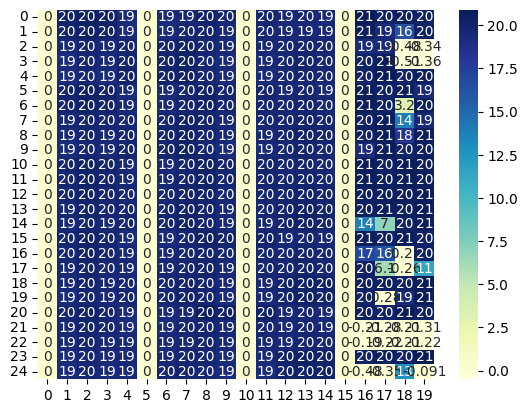

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize(Vtable):
  """
  Visualize the value function
  :param Vtable: The value function
  """
  data = np.array(Vtable).reshape(25, 20) # the reshape is because we can not use heatmap for one-dimensional array so i changed it to two-dimensional
  ax = sns.heatmap(data, annot=True, cmap="YlGnBu")
  plt.show()

visualize(Vtable_trained)

**Question**  
Can we use a pure greedy policy for Q-learning? Explain.

Yes, it is possible to use a pure greedy policy for Q-learning.
In the greedy Q-learning algorithm, the agent always selects the action with the highest Q-value in each state. The Q-values are updated using the Bellman equation, which recursively updates the Q-value for a state-action pair based on the maximum Q-value of the next state. 

The greedy Q-learning algorithm is known to converge to the optimal Q-values under certain conditions, such as the state-action space being finite and the agent exploring all state-action pairs infinitely often.

However, it's worth noting that using a pure greedy policy may not be optimal in some cases. For example, the agent may get stuck in a local optima or miss out on exploring potentially better actions.